# Here we are going to analyze the Restaurant tips data


In [1]:
import seaborn as sns
import pandas as pd

## Tips is one of the popular data sets in seaboen library for restaurant data

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

## It is clear that the dataset has 244 records 

## Lets check out how many week days present in the data set

In [7]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

## We have the datasets that are based on thursay to sunday

In [8]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [9]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

## This data is all about dinner and lunch of restaurant data

## Lets checkout which gender are the most in this dataset 

In [12]:
tips.sex.count()

244

In [18]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

## And also about what  time of food mostly in this dataset

In [19]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Mostly dinners are present in the data set

<AxesSubplot:>

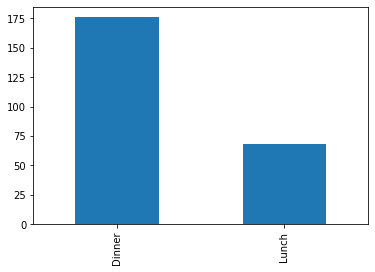

In [20]:
tips.time.value_counts().plot(kind='bar')

In [22]:
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

## Lets checkout when does people gives more tips

In [23]:
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

## For lunch waiters gets 2.7  average tips and for dinner gets  3.10 average tips

<AxesSubplot:xlabel='time'>

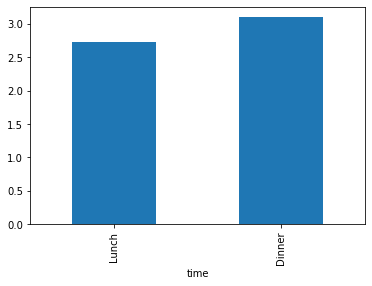

In [24]:
tips.groupby(['time'])['tip'].mean().plot(kind="bar")

## Similarly average tips that is for a smoker will be

<AxesSubplot:xlabel='smoker'>

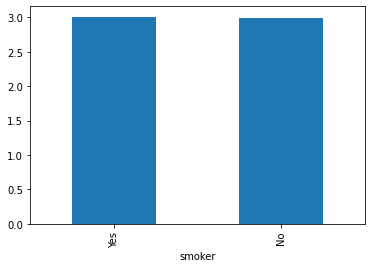

In [25]:
tips.groupby(['smoker'])['tip'].mean().plot(kind="bar")

<AxesSubplot:xlabel='sex'>

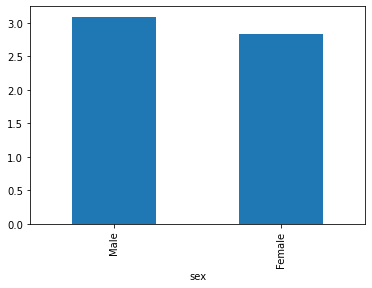

In [26]:
tips.groupby(['sex'])['tip'].mean().plot(kind="bar")

## We can check this also with 2 dimensions as a smoker with sex 

<AxesSubplot:xlabel='smoker,sex'>

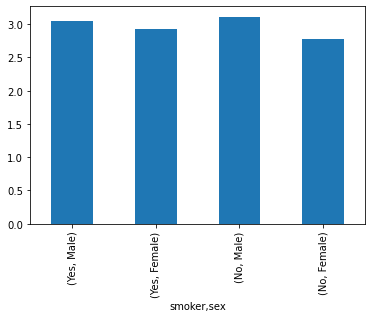

In [27]:
tips.groupby(['smoker','sex'])['tip'].mean().plot(kind="bar")

## So as a conclusion we can say there is a slight variance for non smoking men who gives more tips  based on this data set

In [28]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


## Above is  cross table for the same smoker and sex dimensions

In [29]:
tips.groupby(['smoker','day'])['tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,3.030000,2.7140,2.875476,3.516842
No,2.673778,2.8125,3.102889,3.167895


<AxesSubplot:xlabel='smoker,day'>

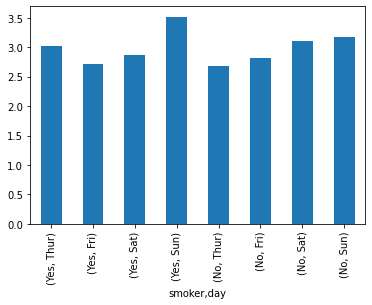

In [31]:
tips.groupby(['smoker','day'])['tip'].mean().plot(kind="bar")

## Smokers on sundays gives more tips than other days

## Next we will do % of tip compared to bill

In [39]:
tips["tips_percent"]= (tips.tip/ tips.total_bill)*100

In [40]:
tips.tips_percent

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Name: tips_percent, Length: 244, dtype: float64

In [41]:
tips

,total_bill,tip,sex,smoker,day,time,size,tips %,tips_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,14.680765
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,9.820426


## Lets visualize the relationship between total bill and tips

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

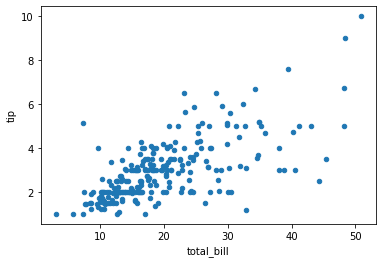

In [42]:
tips.plot.scatter(x='total_bill',y='tip')

## Most of the cases tips depends on the total bill the average tip range but some exceptional cases are there that is when totalbill goes to 40 to 50 dollers we can see an exceptional tip that ranges 2 to 3 dollar which is less compared to bill

## We can also do this with seaborn scatterplot library

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

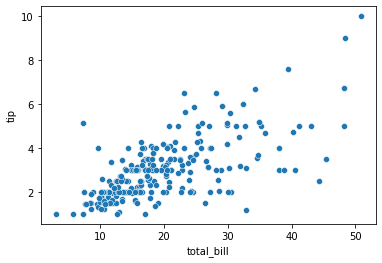

In [43]:
sns.scatterplot(x="total_bill",y="tip",data=tips)

## Lets add the effect for column sex

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

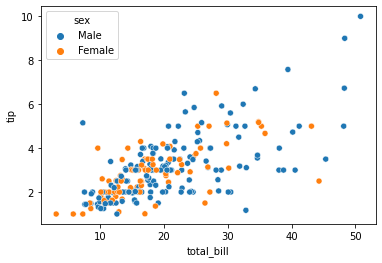

In [44]:
sns.scatterplot(x="total_bill",y="tip",data=tips, hue="sex")

## You can see males are little good at giving tips more than the average

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

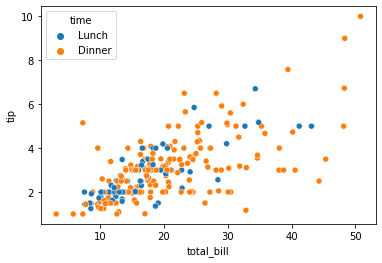

In [45]:
sns.scatterplot(x="total_bill",y="tip",data=tips, hue="time")

## Dinner time have most level and least level of tips

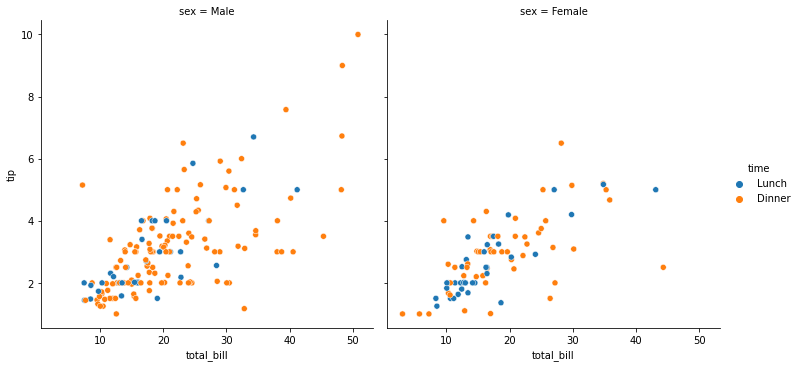

In [47]:
sns.relplot(x="total_bill",y="tip",data=tips, col='sex', hue='time')

## The above one shows differently for male and female

## Lets look at the tips distribution over time (we have displot for distribution plot in seaborn)

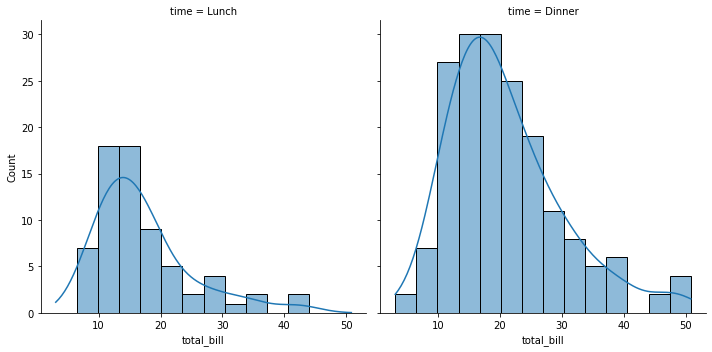

In [49]:
sns.displot(data=tips, x="total_bill", col='time', kde=True)

## Which indecates that people are comming more for dinner in restaurants

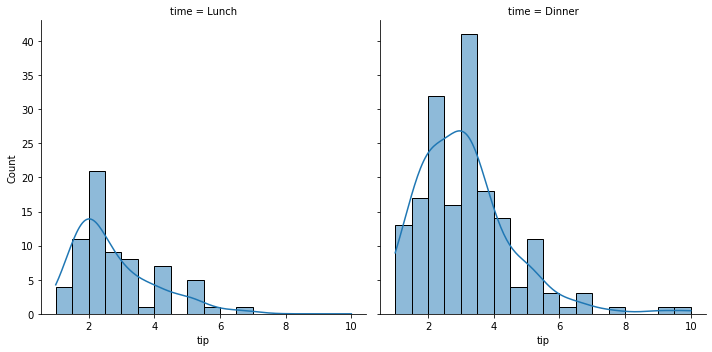

In [51]:
sns.displot(data=tips, x="tip", col='time', kde=True)

## In the case of tips also dinner time is good  and which indecates that restaurants should focus on dinner with delicious food

## Creating corellation and distribution for all the numeric variables by sex 

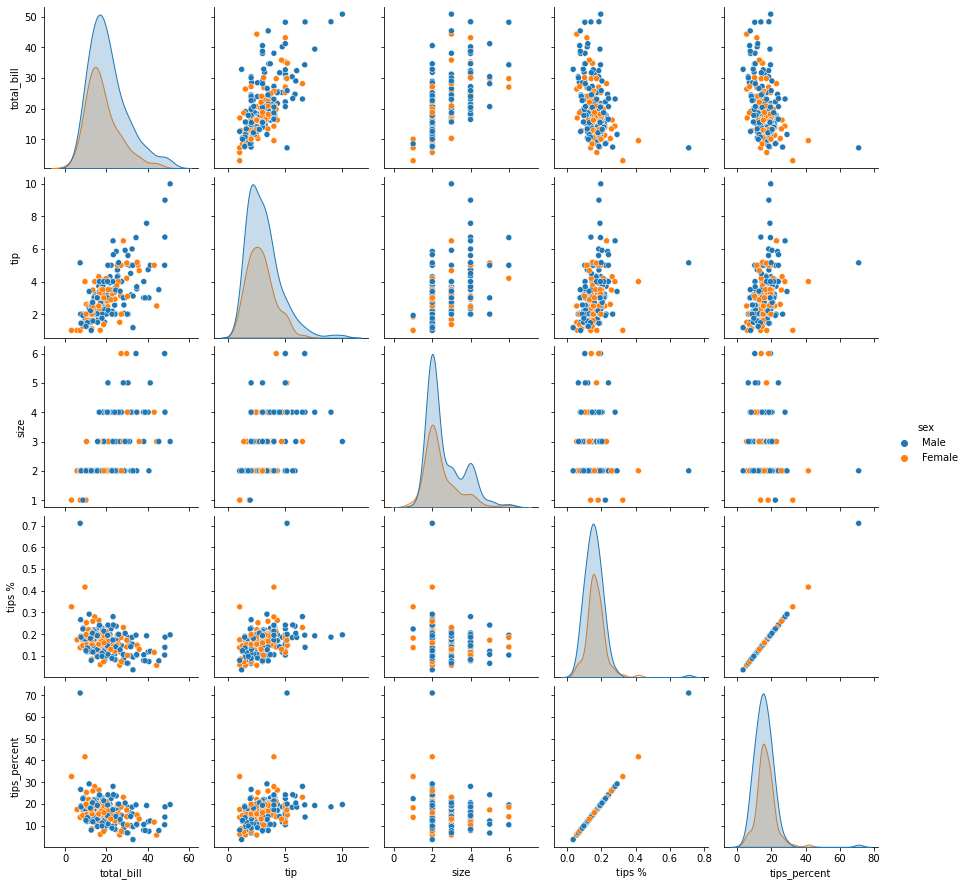

In [52]:
sns.pairplot(data=tips, hue='sex')

In [56]:
tips


,total_bill,tip,sex,smoker,day,time,size,tips %,tips_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,14.680765
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,9.820426


## To remove  column Tips % 

In [62]:
tips.pop('tips %')

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tips %, Length: 244, dtype: float64

## So what we have learned as a conclusion from all these analysis based on this data
->  Dinners have more value counts<br>
->  Dinner time have more customers and total bills obeously more tips data<br>
->  Male customers are more likely to give tips at most range and also atleast range<br>
->  Sundays will be good for waiter because the chance of getting tips is high<br>
->  if he/she is a smoking person  then there is a slight high chance of getting tips<br>
->  Distribution of total_bill hikes in the time of dinner <br>